<img src="img/banner_bioudea.png">

# ÁLBOL DE DECISIÓN

Los árboles de decisión son una técnica de aprendizaje automático supervisado muy utilizada en muchos campos del ML. Como su nombre indica, el _Árbol de Decisión_ toma una serie de decisiones en forma de árbol. Los nodos intermedios (las ramas) representan soluciones. Los nodos finales (las hojas) nos dan la predicción que vamos buscando.

Este algoritmo de ML puede usarse tanto para problemas de <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">Clasificación</a> como para problemas de <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html" target="_blank">Regresión</a>.



## Problema de Clasificación

Usaremos la base de datos <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html" target="_blank">iris</a>. El problema consiste en clasificar correctamente la variedad de la flor _iris_ a partir del ancho y largo de los pétalos y sépalos. Hay tres variedades de flor iris: setosa, versicolor y virginica.

<img src="img/iris_flower.png">

Este conjunto de datos tiene 150 muestras:

* 50 iris setosa
* 50 iris versicolor
* 50 iris virginica

### Importación de los módulos a utilizar

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Carga de dataset desde archivo (.csv)
Para usar esta opción se deben usar librearías como _pandas_

In [2]:
df = pd.read_csv("data/irisdb.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.iloc[:,:3]

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


# Clasificación de Iris con tres Caracteríticas (Sepal Length, Sepal Width y Petal Length) - 3D

In [4]:
X_train, X_test , y_train , y_test = train_test_split(df.iloc[:,:3] , df['class'])
print("Train dataset:",X_train.shape, y_train.shape)
print("Taset dataset:",X_test.shape, y_test.shape)

Train dataset: (112, 3) (112,)
Taset dataset: (38, 3) (38,)


In [5]:
dt = DecisionTreeClassifier(max_depth= 3)
dt.fit(X_train.values,y_train.values)
dt.score(X_test.values,y_test.values)

0.9736842105263158

## Métricas

In [6]:
preds = dt.predict(X_test)
mat = confusion_matrix(y_test , preds)

print("Accuracy: \t", accuracy_score(y_test , preds))

precision = np.diag(mat)/np.sum(mat,axis=1)
print("Precision: \t", precision)

recall = np.diag(mat)/np.sum(mat , axis=0)
print("Recall: \t", recall)

F1 = 2*(precision*recall)/(precision+recall)
F1_inv = F1[::-1]
print("F1 Score: \t",F1)


Accuracy: 	 0.9736842105263158
Precision: 	 [1.         0.93333333 1.        ]
Recall: 	 [1.         1.         0.90909091]
F1 Score: 	 [1.         0.96551724 0.95238095]


C:\Users\asv\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


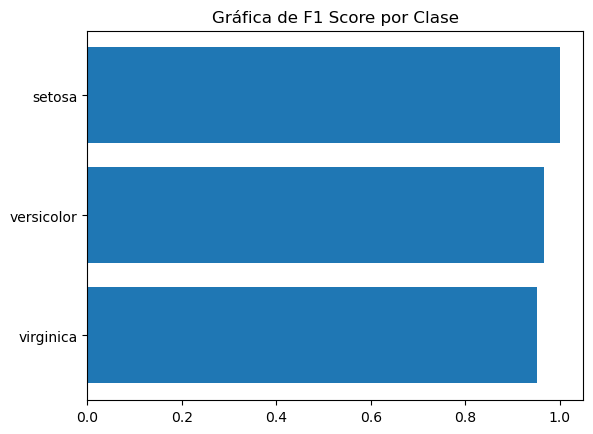

In [7]:
nam_classes = ['setosa', 'versicolor' , 'virginica']
nom_inv = nam_classes
nom_inv.reverse()
datos = F1_inv
plt.barh(nam_classes, datos, align='center')
plt.title("Gráfica de F1 Score por Clase")
plt.show()

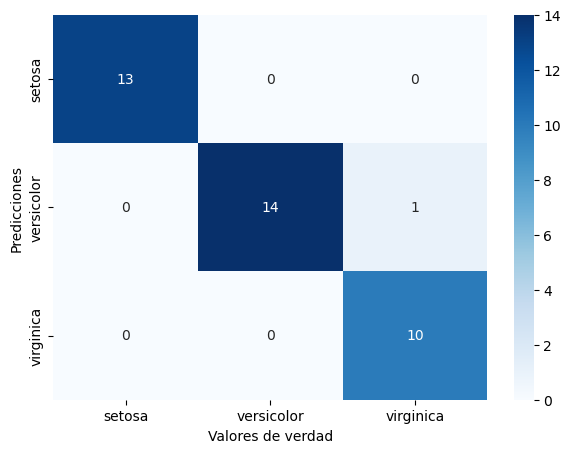

In [8]:
import seaborn as sns

labels = ['setosa', 'versicolor' , 'virginica']
cm = confusion_matrix(y_test , preds)
fig , ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm ,cmap='Blues',annot=True , xticklabels=labels, yticklabels=labels)
plt.xlabel('Valores de verdad')
plt.ylabel('Predicciones')
plt.show()

## Guardar el modelo

In [11]:
import pickle
pickle.dump(dt, open('training_model.pkl', 'wb'))

## Probar el modelo volviendo a cargar los datos.

In [12]:
dt2 = pickle.load(open('training_model.pkl', 'rb'))

In [13]:
dt2.predict(X_test.values)

array([0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2,
       1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2], dtype=int64)

In [14]:
dt2.score(X_test.values,y_test.values)

0.9736842105263158